# Project 2


Wine Quality Dataset:

This dataset contains various physicochemical properties and quality ratings for red wine samples. The features (fixed acidity, volatile acidity, citric acid, etc.) are used to predict the wine's quality, which is rated on a scale from 0 to 10. Each column represents a different aspect of the wine's composition or assessed quality.

1.	What is the most frequently occurring wine quality? What is the highest number in and the lowest number in the quality column?

In [1]:
#Importing Libraries:
import pandas as pd
import numpy as np

In [2]:
#Importing Dataset:
dataset = pd.read_csv("wine_data.csv")

In [3]:
#finding mode(most frequency) of quality column using mode() function
mode_value = dataset['quality'].mode()[0]

In [4]:
print("The most frequently occurring wine quality is", mode_value)

The most frequently occurring wine quality is 5


In [5]:
highest_rate = dataset.max()['quality']
#Finding the maximum value in the quality column using max() function

In [6]:
print("The highest rating received in our wine dataset is", highest_rate)

The highest rating received in our wine dataset is 8.0


In [7]:
lowest_rate = dataset.min()['quality']
#Finding the minimum value in the quality column using min() function

In [8]:
print("The lowest rating received in our wine dataset is", lowest_rate)

The lowest rating received in our wine dataset is 3.0




---



2.	How is `fixed acidity` correlated to the quality of the wine? How does the alcohol content affect the quality? How is the `free Sulphur dioxide` content correlated to the quality of the wine?

(i) How is fixed acidity correlated to the quality of the wine?

In [9]:
fixed_acidity = dataset.iloc[:,[0]]
quality = dataset.iloc[:,[11]]

In [10]:
combined_data = pd.concat([fixed_acidity, quality], axis = 1)

In [11]:
# Making the correlation between fixed_acidity and quality:
correlation_matrix_1 = combined_data.corr()

In [12]:
print(correlation_matrix_1)

               fixed acidity   quality
fixed acidity       1.000000  0.124052
quality             0.124052  1.000000


The correlation between fixed acidity and quality of wine is 0.124052.
Positive correlation means that both variables change in the same direction.

(ii) How does the alcohol content affect the quality?

In [13]:
# Group by the quality and calculate the sum of alcohol for each rate
grouped_df = dataset.groupby('quality')['alcohol'].sum().reset_index()

# Print the aggregated data
print(grouped_df)

   quality      alcohol
0        3    99.550000
1        4   544.050000
2        5  6741.700000
3        6  6781.633333
4        7  2281.716667
5        8   217.700000


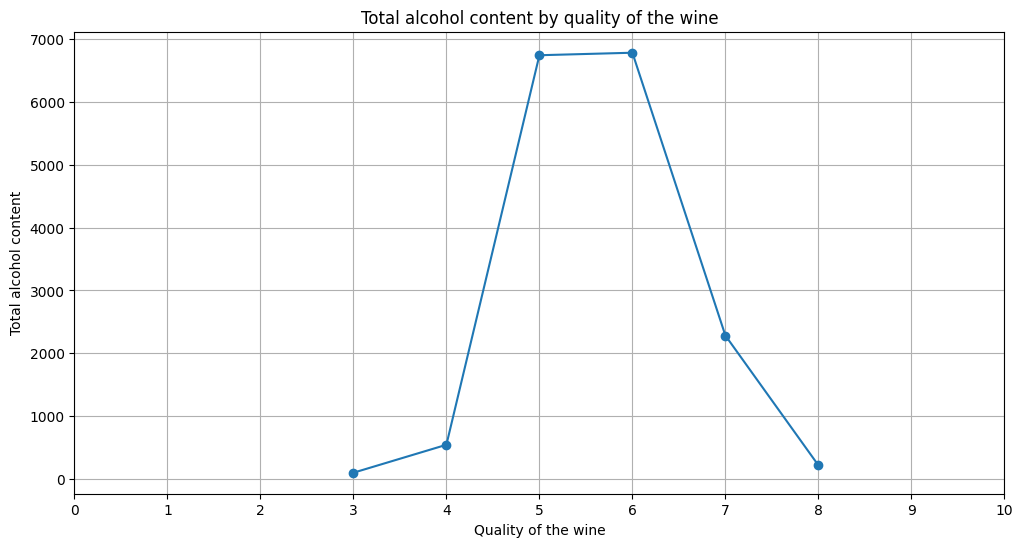

In [14]:
import matplotlib.pyplot as plt
# Plotting the relationship
plt.figure(figsize=(12, 6))
plt.plot(grouped_df['quality'], grouped_df['alcohol'], marker='o')
plt.title('Total alcohol content by quality of the wine')
plt.xlabel('Quality of the wine')
plt.ylabel('Total alcohol content')
plt.xticks(range(11))
plt.grid(True)
plt.show()

(iii) How is the free Sulphur dioxide content correlated to the quality of the wine?

In [15]:
free_sulphur_dioxide = dataset.iloc[:, [5]]

In [16]:
combined_data2 = pd.concat([free_sulphur_dioxide, quality], axis = 1)

In [17]:
# Finding the correlation matrix using corr() function
correlation_matrix_2_3 = combined_data2.corr()

In [18]:
print(correlation_matrix_2_3)

                     free sulfur dioxide   quality
free sulfur dioxide             1.000000 -0.050656
quality                        -0.050656  1.000000


The correlation between free sulpher dioxide and quality of the wine is -0.050656.

A negative correlation means that the variables change in opposite directions.



---



3.	What is the average `residual sugar` for the best quality wine and the lowest quality wine in the dataset?

In [19]:
# Dividing/grouping the dataset wrt quality's different value using groupby() function and finding mean of residual sugar of each group seperately.
avg_residual_sugar = dataset.groupby('quality')['residual sugar'].mean()

In [20]:
print(avg_residual_sugar)

quality
3    2.635000
4    2.694340
5    2.528855
6    2.477194
7    2.720603
8    2.577778
Name: residual sugar, dtype: float64


The average value of residual sugar for the best quality wine (rating = 8) and the lowest quality wine (rating = 3) is 2.635000 and 2.577778 respectively



---



4.	Does `volatile acidity` has an effect over the quality of the wine samples in the dataset?

One way to find out the if there is an effect over the quality of wine or not is checking out correlation.

If correlation is +1 or -1, then it indicates strong linear relation while if correlation is close or equal to 0, then it indicates weak or no linear relation between them.

In [21]:
volatile_acidity = dataset.iloc[:,[1]]

In [22]:
combined_data3 = pd.concat([volatile_acidity, quality], axis = 1)

In [23]:
correlation_matrix_4 = combined_data3.corr()
print(correlation_matrix_4)

                  volatile acidity   quality
volatile acidity          1.000000 -0.390558
quality                  -0.390558  1.000000


Yes, volatile acidity has an effect over the quality of the wine samples. They are negatively correlated (correlation = -0.390558) with each other means that the variables change in opposite direction.



---



5.	Train a Decision Tree model and Random Forest Model separately to predict the Quality of the given samples of wine. Compare the Accuracy scores for both models.

Decision Tree Model:

In [24]:
features = dataset.drop('quality', axis = 1)
quality = dataset['quality']

In [25]:
# Train-test split:
from sklearn.model_selection import train_test_split
features_train, features_test, quality_train, quality_test = train_test_split(features, quality, test_size = 0.25, random_state = 0)

In [26]:
# Features Scaling:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features_train = sc.fit_transform(features_train)
features_test = sc.transform(features_test)

In [27]:
# Training the Decision Tree classification model on the training set:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(features_train, quality_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [28]:
# Predicting the features_test and comparing them with quality_test (actual value)
quality_pred = classifier.predict(features_test)

In [29]:
# Printing the quality_pred and quality_test side by side for comparison.
# To do so, we use concatenate() function with axis = 1, applying on reshaped of quality_pred and quality_test to column format.
print(np.concatenate((quality_pred.reshape(len(quality_pred), 1), quality_test.values.reshape(len(quality_test), 1)), axis = 1))

[[5 6]
 [5 5]
 [7 7]
 [5 6]
 [5 5]
 [6 6]
 [5 5]
 [6 6]
 [4 4]
 [5 5]
 [5 5]
 [5 5]
 [6 6]
 [4 5]
 [7 6]
 [6 6]
 [7 7]
 [4 5]
 [5 5]
 [4 4]
 [7 7]
 [6 6]
 [6 6]
 [4 4]
 [5 6]
 [5 5]
 [5 5]
 [6 7]
 [5 5]
 [6 6]
 [6 5]
 [6 6]
 [6 5]
 [5 6]
 [7 7]
 [7 7]
 [6 5]
 [3 6]
 [7 6]
 [6 7]
 [5 5]
 [6 7]
 [6 6]
 [7 6]
 [6 5]
 [5 5]
 [6 6]
 [6 6]
 [5 6]
 [6 5]
 [5 5]
 [5 5]
 [6 6]
 [6 6]
 [6 6]
 [5 5]
 [5 5]
 [5 5]
 [7 6]
 [6 5]
 [5 5]
 [7 6]
 [6 6]
 [6 6]
 [5 5]
 [6 6]
 [5 5]
 [5 5]
 [6 6]
 [6 6]
 [6 6]
 [6 6]
 [5 4]
 [6 6]
 [6 5]
 [6 6]
 [5 5]
 [5 5]
 [5 5]
 [7 6]
 [6 6]
 [5 5]
 [6 6]
 [7 6]
 [6 6]
 [6 5]
 [4 6]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [6 6]
 [6 4]
 [6 5]
 [5 7]
 [6 6]
 [6 6]
 [5 5]
 [5 6]
 [5 5]
 [7 8]
 [6 6]
 [6 6]
 [6 6]
 [5 5]
 [5 5]
 [5 5]
 [3 5]
 [6 7]
 [5 5]
 [6 6]
 [5 5]
 [8 7]
 [6 5]
 [5 6]
 [6 6]
 [6 6]
 [7 7]
 [6 6]
 [6 6]
 [5 5]
 [4 7]
 [5 5]
 [6 5]
 [7 6]
 [6 6]
 [5 5]
 [5 5]
 [6 5]
 [7 6]
 [4 6]
 [5 6]
 [5 6]
 [5 6]
 [6 6]
 [5 5]
 [6 6]
 [5 5]
 [7 8]
 [5 5]
 [6 6]
 [6 5]
 [6 6]

In [30]:
# Making the confusion matrix and accuracy score:
from sklearn.metrics import confusion_matrix, accuracy_score
d_cm = confusion_matrix(quality_test, quality_pred)
print(d_cm)

[[  0   1   1   0   0   0]
 [  1   3   6   3   1   0]
 [  3  11 109  39   7   0]
 [  2   4  35 110  19   0]
 [  0   1   4  12  20   3]
 [  0   0   0   1   4   0]]


In [31]:
accuracy_score(quality_test, quality_pred)

0.605

The accuracy score for Decision Tree Model is 0.605.

Random Forest Model:

In [32]:
# We have already done feature scaling and spliting data into training and testing set, so we will use them.
# We will start with training our random forest model.
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 0)
rf_classifier.fit(features_train, quality_train)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=0)

In [33]:
rf_quality_pred = rf_classifier.predict(features_test)

In [34]:
print(np.concatenate((rf_quality_pred.reshape(len(rf_quality_pred), 1), quality_test.values.reshape(len(quality_test), 1)), axis = 1))

[[6 6]
 [5 5]
 [7 7]
 [5 6]
 [5 5]
 [6 6]
 [5 5]
 [6 6]
 [5 4]
 [5 5]
 [5 5]
 [5 5]
 [6 6]
 [6 5]
 [6 6]
 [7 6]
 [7 7]
 [5 5]
 [5 5]
 [5 4]
 [6 7]
 [5 6]
 [6 6]
 [6 4]
 [6 6]
 [5 5]
 [5 5]
 [7 7]
 [5 5]
 [6 6]
 [6 5]
 [6 6]
 [6 5]
 [6 6]
 [7 7]
 [7 7]
 [5 5]
 [6 6]
 [6 6]
 [6 7]
 [5 5]
 [6 7]
 [7 6]
 [7 6]
 [6 5]
 [5 5]
 [5 6]
 [6 6]
 [5 6]
 [6 5]
 [5 5]
 [5 5]
 [6 6]
 [6 6]
 [5 6]
 [5 5]
 [5 5]
 [5 5]
 [7 6]
 [6 5]
 [5 5]
 [6 6]
 [6 6]
 [6 6]
 [5 5]
 [6 6]
 [5 5]
 [5 5]
 [7 6]
 [6 6]
 [5 6]
 [5 6]
 [5 4]
 [5 6]
 [6 5]
 [6 6]
 [5 5]
 [5 5]
 [5 5]
 [7 6]
 [6 6]
 [5 5]
 [6 6]
 [6 6]
 [6 6]
 [5 5]
 [6 6]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [6 6]
 [6 4]
 [5 5]
 [7 7]
 [5 6]
 [6 6]
 [5 5]
 [5 6]
 [5 5]
 [7 8]
 [7 6]
 [6 6]
 [6 6]
 [5 5]
 [5 5]
 [5 5]
 [6 5]
 [6 7]
 [5 5]
 [6 6]
 [5 5]
 [8 7]
 [5 5]
 [6 6]
 [6 6]
 [5 6]
 [7 7]
 [6 6]
 [6 6]
 [5 5]
 [6 7]
 [5 5]
 [5 5]
 [6 6]
 [7 6]
 [5 5]
 [5 5]
 [6 5]
 [6 6]
 [5 6]
 [5 6]
 [6 6]
 [6 6]
 [6 6]
 [5 5]
 [6 6]
 [5 5]
 [6 8]
 [5 5]
 [6 6]
 [5 5]
 [5 6]

In [35]:
# Making confusion matrix and accuracy score:
rf_cm = confusion_matrix(quality_test, rf_quality_pred)
print(rf_cm)

[[  0   0   1   1   0   0]
 [  0   0  10   4   0   0]
 [  0   0 135  31   3   0]
 [  0   1  35 122  12   0]
 [  0   0   3  14  21   2]
 [  0   0   0   2   3   0]]


In [36]:
accuracy_score(quality_test, rf_quality_pred)

0.695

The accuracy score of Random Forest Model with n_estimators = 20 is 0.695.

The accuracy score of Random Forest (0.695) is higher than Decision Tree algorithm (0.605).

Hence, Random Forest model is more accurate for our dataset.



---



---

